# Assignment: Оптимизация в Python: глобальная оптимизация и оптимизация негладкой функции

### Введение

Сначала вы решите задачу поиска минимума функции с помощью одного из градиентных методов оптимизации, затем увидите отличия в работе градиентного метода и одного из методов глобальной оптимизации, а в заключение – найдете глобальный минимум негладкой функции, т.е. функции, у которой не всегда определен градиент.

Понимание задачи глобальной оптимизации и отличий градиентных методов, от методов, не использующих градиент, очень полезно в задачах анализа данных, в частности, для подбора параметров алгоритмов.
### Материалы

    Справка по функциям пакета scipy.optimize: http://docs.scipy.org/doc/scipy/reference/optimize.html
    Matplotlib User Guide: http://matplotlib.org/users/index.html

### Инструкция по выполнению

Данное задание состоит из трех частей. В каждой ответом будет набор чисел

## Задача 1. Минимизация гладкой функции

1. Рассмотрим все ту же функцию из задания по линейной алгебре: f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2), но теперь уже на промежутке [1, 30]
2. В первом задании будем искать минимум этой функции на заданном промежутке с помощью scipy.optimize. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а f(x) мы рассмотрим как удобный учебный пример.
3. Напишите на Питоне функцию, вычисляющую значение f(x) по известному x. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции sin и exp нужно импортировать из модуля math.
4. Попробуйте найти минимум, используя стандартные параметры в функции scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат.
5. Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1.
6. Теперь измените начальное приближение на x=30. Значение функции в точке минимума - ваш второй ответ по заданию 1.
7. Стоит обдумать полученный результат. Почему ответ отличается в зависимости от начального приближения? Если нарисовать график функции, можно увидеть, в какие именно минимумы мы попали.

In [113]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

SECTION_START = 1
SECTION_END = 30
STEP = 1e-2

mins = {}


def f(x: list) -> float:
    return math.sin(x[0] / 5.0) * math.exp(x[0] / 10.0) + 5 * math.exp(-x[0] / 2.0)

In [114]:
starts = [2, 30]

for start in starts:
    mins[start] = opt.minimize(f, start, method="BFGS")
    print(f"start: {start}\tx: {mins[start].x[0]}\tf: {f(mins[start].x)}")

start: 2	x: 4.136276182444531	f: 1.7452682903449388
start: 30	x: 25.88019338747479	f: -11.898894665981285


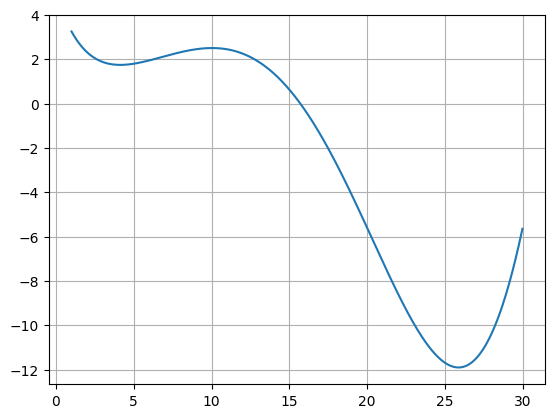

In [115]:
plt.grid()
plt.plot(
    np.arange(SECTION_START, SECTION_END, STEP),
    [f([x]) for x in np.arange(SECTION_START, SECTION_END, STEP)],
)

## Задача 2: Глобальная оптимизация

1. Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации - дифференциальную эволюцию.
2. Изучите документацию и примеры использования функции scipy.optimize.differential_evolution.
3. Обратите внимание, что границы значений аргументов функции представляют собой список кортежей (list, в который помещены объекты типа tuple). Даже если у вас функция одного аргумента, возьмите границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации scipy.optimize.differential_evolution длина этого списка используется чтобы определить количество аргументов функции.
4. Запустите поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]. Полученное значение функции в точке минимума - ответ в задаче 2. Запишите его с точностью до второго знака после запятой. В этой задаче ответ - только одно число.
5.Дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.
6. Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

In [116]:
mins["global"] = opt.differential_evolution(f, [(SECTION_START, SECTION_END)])

print(f"differential_evolution_res:\t{round(mins["global"].fun, 2)}")

differential_evolution_res:	-11.9


In [117]:
print("global")
print(f"nit: {mins["global"].nit} \t nfev: {mins["global"].nfev}")

print("\nlocal mins")
print(f"nit: {mins[30].nit} \t nfev: {mins[30].nfev}")

global
nit: 4 	 nfev: 81

local mins
nit: 6 	 nfev: 14


## Задача 3. Минимизация негладкой функции

1. Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.
2. Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Постройте график h(x) с помощью matplotlib.
3. Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.
4. Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании.
5. Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).

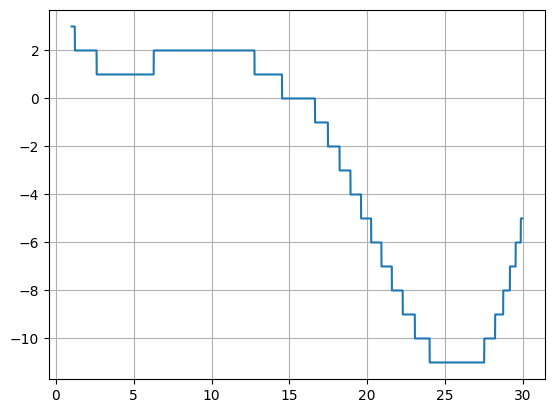

In [118]:
def h(x: float) -> int:
    return int(f(x))


plt.grid()
plt.plot(
    np.arange(SECTION_START, SECTION_END, STEP),
    [h([x]) for x in np.arange(SECTION_START, SECTION_END, STEP)],
)

In [119]:
local_min = opt.minimize(h, 30, method="BFGS")
print(f"min f by opt.minimize: {h(local_min.x)}")

min f by opt.minimize: -5


In [120]:
global_min = opt.differential_evolution(h, [(SECTION_START, SECTION_END)])
print(f"min f by opt.differential_evolution: {global_min.fun}")

min f by opt.differential_evolution: -11.0


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


<BarContainer object of 30 artists>

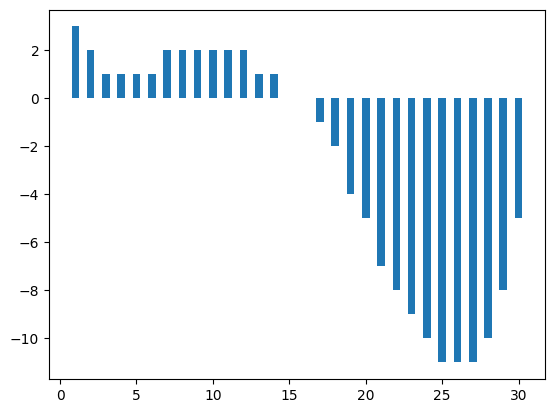

In [121]:
gradient_mins = [
    (start, h([start]), opt.minimize(h, start))
    for start in range(SECTION_START, SECTION_END + 1)
]

print([abs(x[1] - h(x[2].x)) for x in gradient_mins])

plt.bar([x[0] for x in gradient_mins], [x[1] for x in gradient_mins], width=0.5)

### Вывод

Можно с точностью сказать, что scipy.opt.minimize для любой стартовой точки x выдает значение функции h(x) в этой точке. Вероятно это происходит из-за отсутствия градиента и алгоритм останавливается в стартовой точке.

# Анализ датасета о продуктах

Ход работы:
1. Импортируйте библиотеки, которые были описаны на лекции
2. Импортируйте датасет foodmart.products.tsv, предварительно скачав его
3. Проведите анализ данных, используя лекционный файл 6 EDA в качестве примера.
 - Прим. *Для отображения используйте библиотеку seaborn или plotly!*
 - Отобразите 5 первых элементов таблицы и пять последних
 - Отобразите статистику по датасету, используя функции .info(), .describe()
 - Изучите таблицу на наличие дублей, удалите их, если обнаружите
 - Визуализируйте данные (обязательно scatterplot, hist, countplot, pairplot + что-нибудь интересное из библиотеки на ваш вкус)
 - Постройте матрицу корреляции признаков
 - Изучите пропуски, обработайте их удалением или заполнением (средним значением, модой и тд)
 - Поищите выбросы в данных. Их не удаляйте, добавьте новый столбец-маркер "Outlier" и отметьте в нем True для выбросов и False - в противоположном случае
 - Преобразуйте все данные к их истинным типам. Например, low_fat - к типу bool, подумайте, что нужно сделать. Числовые типы - соответственно к int или float
 - Приведите все столбцы строкового типа к нижнему регистру
 - brand_name дублируется в product_name, очистите product_name от дублирования

In [122]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_csv("./foodmart.products.csv", index_col="product_id")

In [123]:
df.head(5)

,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
product_id,,,,,,,,,,,,,,
1,30,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.9,12.60,7.40
2,52,Washington,Washington Mango Drink,96516502499,0.74,7.42,4.42,False,True,18,8,13.4,3.71,22.60
3,52,Washington,Washington Strawberry Drink,58427771925,0.83,13.10,11.10,True,True,17,13,14.4,11.00,7.77
4,19,Washington,Washington Cream Soda,64412155747,3.64,10.60,9.60,True,False,26,10,22.9,18.90,7.93
5,19,Washington,Washington Diet Soda,85561191439,2.19,6.66,4.65,True,False,7,10,20.7,21.90,19.20


In [124]:
df.tail(5)

,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
product_id,,,,,,,,,,,,,,
1556,53,CDR,CDR Creamy Peanut Butter,29538288712,2.65,6.94,3.94,True,True,7,9,11.10,3.98,17.5
1557,33,CDR,CDR Strawberry Preserves,50687324404,1.20,15.40,13.30,True,False,15,6,14.10,14.80,19.3
1558,53,CDR,CDR Extra Chunky Peanut Butter,84930775761,2.16,11.50,9.50,False,True,22,10,7.35,9.29,12.4
1559,33,CDR,CDR Apple Preserves,75317577719,1.62,21.00,20.00,False,False,7,9,15.30,20.20,18.8
1560,31,CDR,CDR Grape Jelly,54896665215,1.60,12.50,10.50,False,True,1,9,5.44,3.24,18.3


In [125]:
df.info()
df.describe()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
Index: 1560 entries, 1 to 1560
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_class_id    1560 non-null   int64  
 1   brand_name          1560 non-null   object 
 2   product_name        1560 non-null   object 
 3   SKU                 1560 non-null   int64  
 4   SRP                 1560 non-null   float64
 5   gross_weight        1560 non-null   float64
 6   net_weight          1560 non-null   float64
 7   recyclable_package  1560 non-null   bool   
 8   low_fat             1560 non-null   bool   
 9   units_per_case      1560 non-null   int64  
 10  cases_per_pallet    1560 non-null   int64  
 11  shelf_width         1560 non-null   float64
 12  shelf_height        1560 non-null   float64
 13  shelf_depth         1560 non-null   float64
dtypes: bool(2), float64(6), int64(4), object(2)
memory usage: 161.5+ KB


product_class_id        int64
brand_name             object
product_name           object
SKU                     int64
SRP                   float64
gross_weight          float64
net_weight            float64
recyclable_package       bool
low_fat                  bool
units_per_case          int64
cases_per_pallet        int64
shelf_width           float64
shelf_height          float64
shelf_depth           float64
dtype: object

### drop and count duplicates

In [126]:
duplicate_rows = df[df.duplicated()]
df.drop_duplicates(inplace=True)

print(f"doubles count: {duplicate_rows.shape[0]}")

doubles count: 0


### visualize data

scatterplot


<Axes: xlabel='gross_weight', ylabel='net_weight'>

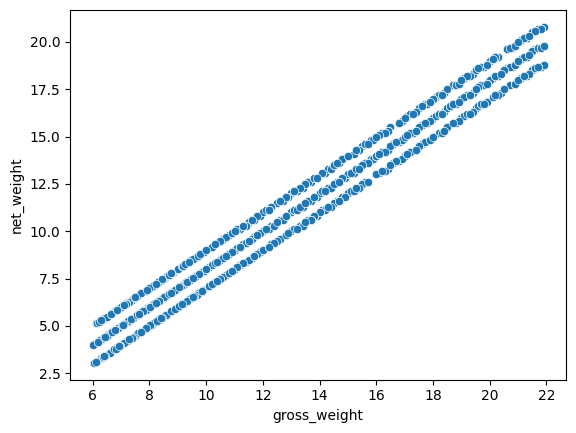

In [127]:
print("scatterplot")
sns.scatterplot(df, x="gross_weight", y="net_weight")

histplot


<Axes: xlabel='units_per_case', ylabel='Count'>

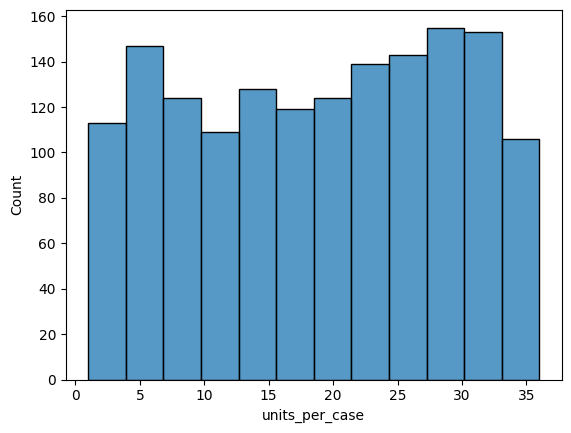

In [128]:
print("histplot")
sns.histplot(df["units_per_case"])

pairplot


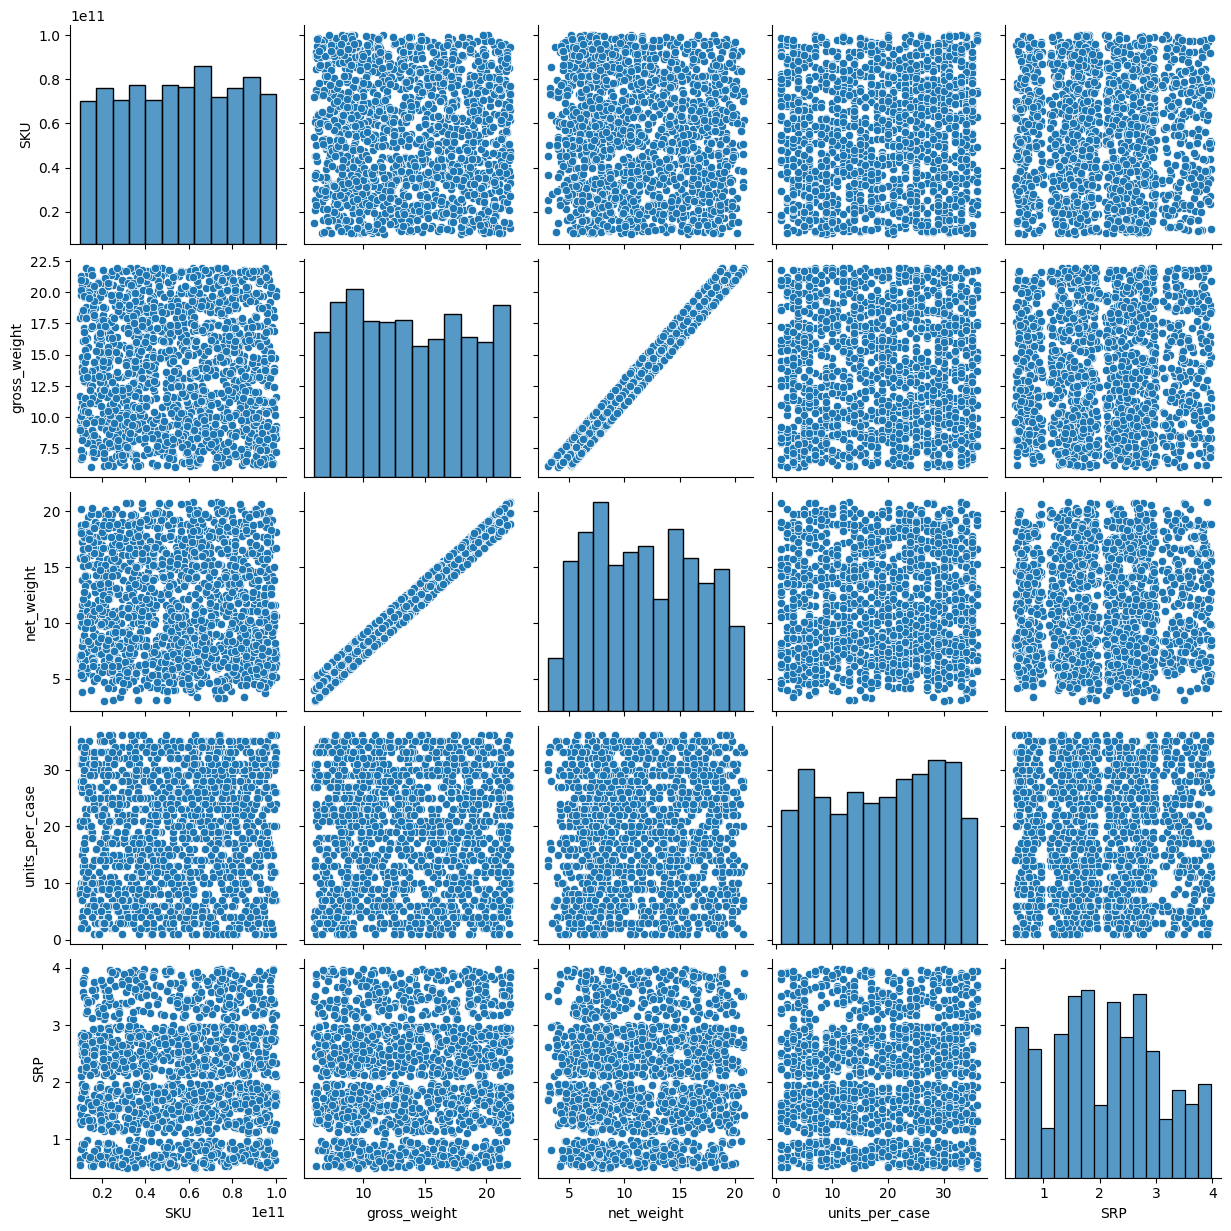

In [129]:
print("pairplot")
sns.pairplot(df[["SKU", "gross_weight", "net_weight", "units_per_case", "SRP"]])

countplot


<Axes: xlabel='brand_name', ylabel='count'>

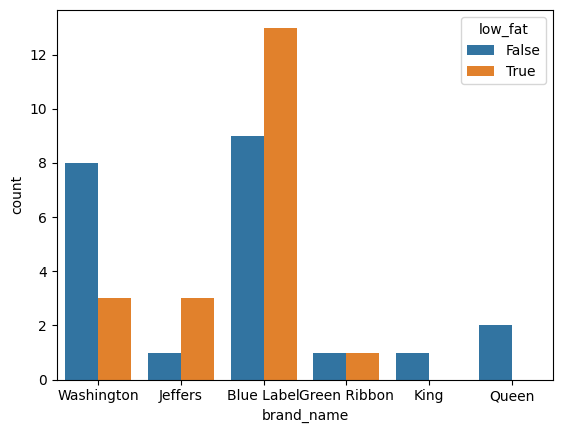

In [130]:
print("countplot")
sns.countplot(
    df[df["brand_name"].isin(df["brand_name"].unique()[:6])],
    x="brand_name",
    hue="low_fat",
)

kdeplot


/var/folders/fy/g1qqmmtj5n797vr8g06trd4r0000gn/T/ipykernel_838/75411297.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


<Axes: xlabel='net_weight', ylabel='Density'>

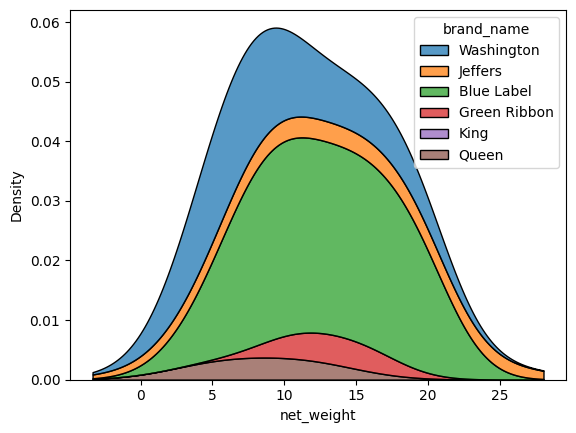

In [131]:
print("kdeplot")
sns.kdeplot(
    data=df[df["brand_name"].isin(df["brand_name"].unique()[:6])],
    x="net_weight",
    hue="brand_name",
    multiple="stack",
)

relplot


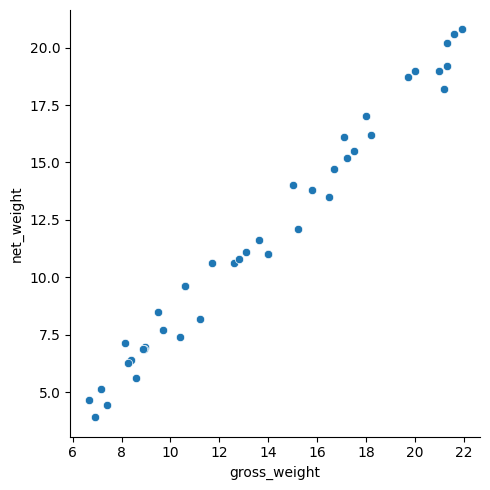

In [132]:
print("relplot")
g = sns.relplot(
    data=df[df["brand_name"].isin(df["brand_name"].unique()[:6])],
    x="gross_weight",
    y="net_weight",
)

### corr matrix

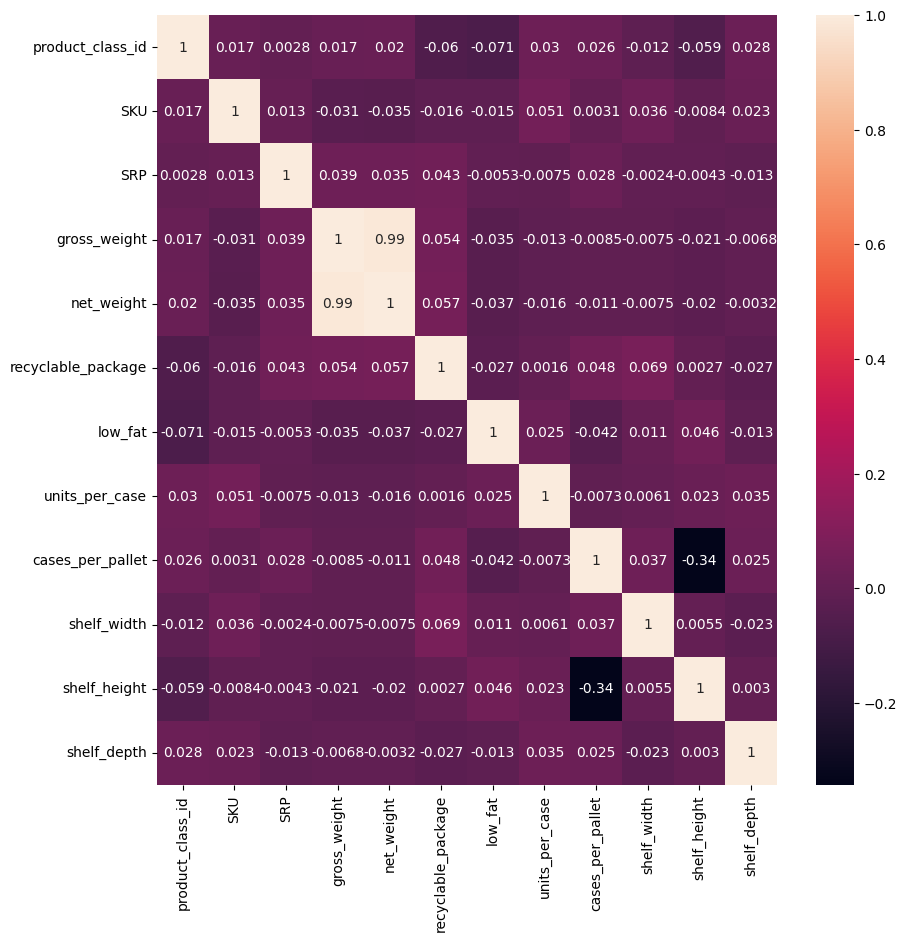

In [133]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

### drop skips and analyze outliers

<Axes: xlabel='net_weight'>

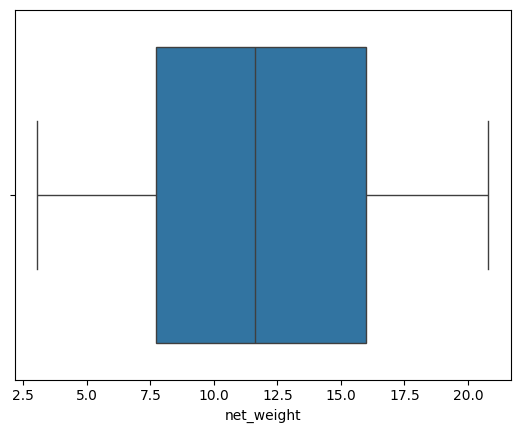

In [134]:
df.dropna(inplace=True)

df.head(5)

df["net_weight_z"] = stats.zscore(df["net_weight"])
df["Outlier"] = df["net_weight_z"].apply(lambda x: True if abs(x) > 2 else False)

sns.boxplot(x=df["net_weight"])

### string stuff with columns

In [135]:
string_columns = df.select_dtypes(include=["object"]).columns
df_lower = df.copy()

for col in string_columns:
    df_lower[col] = df_lower[col].str.lower()

df_lower.head(5)

,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,net_weight_z,Outlier
product_id,,,,,,,,,,,,,,,,
1,30,washington,washington berry juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.9,12.60,7.40,-1.151114,False
2,52,washington,washington mango drink,96516502499,0.74,7.42,4.42,False,True,18,8,13.4,3.71,22.60,-1.570956,False
3,52,washington,washington strawberry drink,58427771925,0.83,13.10,11.10,True,True,17,13,14.4,11.00,7.77,-0.147330,False
4,19,washington,washington cream soda,64412155747,3.64,10.60,9.60,True,False,26,10,22.9,18.90,7.93,-0.467007,False
5,19,washington,washington diet soda,85561191439,2.19,6.66,4.65,True,False,7,10,20.7,21.90,19.20,-1.521939,False


In [136]:
df["product_name"] = df["product_name"].replace(
    to_replace=df["brand_name"].unique(),
    value="",
    regex=True,
)

df["product_name"] = df["product_name"].str.strip()

df.head(5)

,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,net_weight_z,Outlier
product_id,,,,,,,,,,,,,,,,
1,30,Washington,Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.9,12.60,7.40,-1.151114,False
2,52,Washington,Mango Drink,96516502499,0.74,7.42,4.42,False,True,18,8,13.4,3.71,22.60,-1.570956,False
3,52,Washington,Strawberry Drink,58427771925,0.83,13.10,11.10,True,True,17,13,14.4,11.00,7.77,-0.147330,False
4,19,Washington,Cream Soda,64412155747,3.64,10.60,9.60,True,False,26,10,22.9,18.90,7.93,-0.467007,False
5,19,Washington,Diet Soda,85561191439,2.19,6.66,4.65,True,False,7,10,20.7,21.90,19.20,-1.521939,False
